In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations


ACTS = [ACT0, ACT1, ACT2, ACT3]


In [3]:
def get_thr(act):
    return {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2, ACT3: THR_ACT3}[act]

def make_df(data):
    df = pd.DataFrame()

    for d in data:
        df_temp = pd.read_csv(d['file'])

        df_temp = df_temp[df_temp[DIST] < 20]
        df_temp[DIST] = df_temp[DIST].apply(lambda x: - x)
        df_temp[LABEL] = d['label']

        for a in ACTS:
            df_temp[a] = df_temp[a].apply(clean_activations)
            df_temp[a] = df_temp[a].apply(np.median)

        df = df.append(df_temp)
    return df


def show(data, pprint=True, thr=False):
    labels = {ACT0: 'Left', ACT1: 'Centre-Left', ACT2: 'Centre-Right', ACT3: 'Right'}

    fig, axs = plt.subplots(1, 4, figsize=(20,5))

    for i, act in enumerate(ACTS):                
        axs[i].plot(data[DIST], data[act], label = 'Raw')
        axs[i].set_title(labels[act])

        if thr:
            thr_act = data[get_thr(act)]
            axs[i].plot(data[DIST], thr_act, label='Threshold: '  + str(thr[i]))
            axs[i].legend()
        axs[i].set_xlabel('Distance')
        axs[i].set_ylabel('Activation')

    fig.suptitle('Activations for: ' + data[LABEL].iloc[0])
    plt.show()

    if pprint:
        for a in ACTS:
            print('\n  - ' + a + ':\n')
            print('    - Mean: ' + str(round(np.mean(data[a]), 2)))
            print('    - Median: ' + str(round(np.median(data[a]), 2)))
            print('    - Std: ' + str(round(np.std(data[a]), 2)))
        print('\n')

In [4]:
def add_threshold(df, act, t):
    thr = {ACT0: THR_ACT0, ACT1: THR_ACT1, ACT2: THR_ACT2, ACT3: THR_ACT3}[act]
    df[thr] = df[act]
    df[thr] = df[thr].apply(lambda x: x if x >= t else np.nan)
    return df
    

## Central obstacle

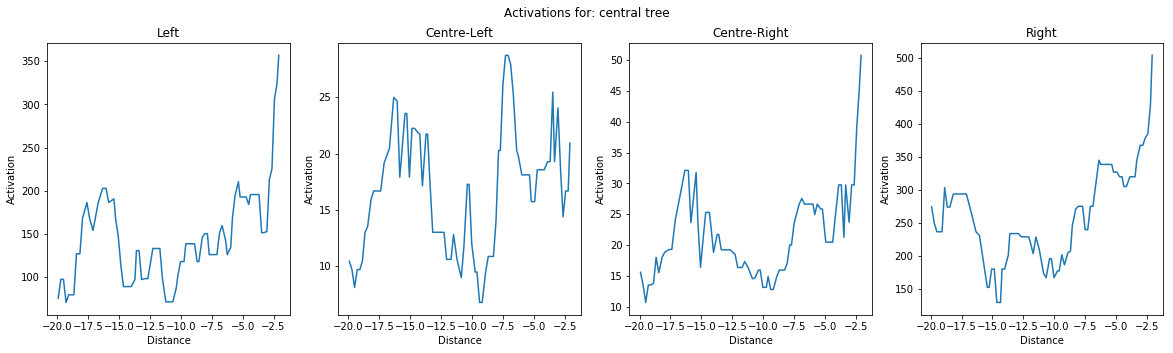


  - activation_0:

    - Mean: 145.76
    - Median: 138.72
    - Std: 54.68

  - activation_1:

    - Mean: 16.84
    - Median: 17.25
    - Std: 5.42

  - activation_2:

    - Mean: 21.71
    - Median: 20.46
    - Std: 7.18

  - activation_3:

    - Mean: 261.17
    - Median: 249.69
    - Std: 71.0




In [5]:
data = [
    {
        'file': 'csv/0-central-obstacle-0.csv',
        'label': 'central tree'
    }
]

df = make_df(data)
# df = add_threshold(df, ACT0, thrs[0])
# df = add_threshold(df, ACT1, thrs[1])
# df = add_threshold(df, ACT2, thrs[2])

show(df, thr=False)

## Right obstacle only

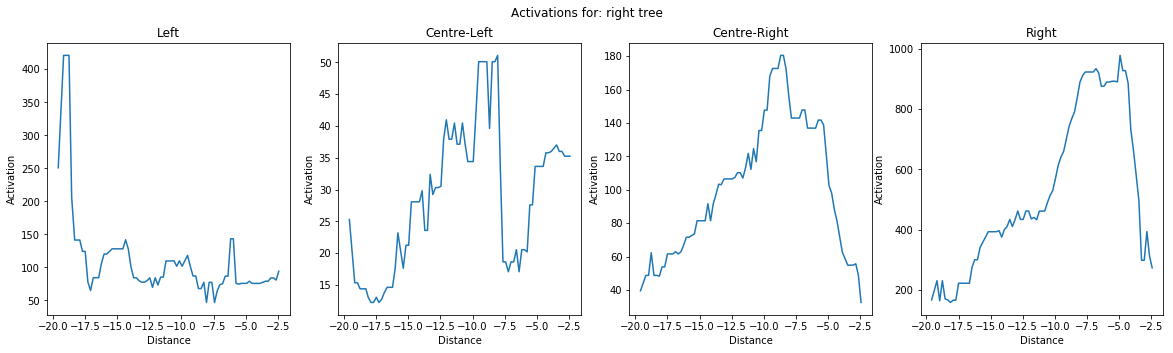


  - activation_0:

    - Mean: 109.59
    - Median: 84.9
    - Std: 69.05

  - activation_1:

    - Mean: 28.7
    - Median: 29.53
    - Std: 11.11

  - activation_2:

    - Mean: 101.99
    - Median: 103.21
    - Std: 39.98

  - activation_3:

    - Mean: 528.57
    - Median: 450.85
    - Std: 260.82




In [6]:
data = [
    {
        'file': 'csv/0-right-obstacle-0.csv',
        'label': 'right tree'
    }
]

df = make_df(data)
# df = add_threshold(df, ACT0, thrs[0])
# df = add_threshold(df, ACT1, thrs[1])
# df = add_threshold(df, ACT2, thrs[2])

show(df, thr=False)

## Right and central obstacle

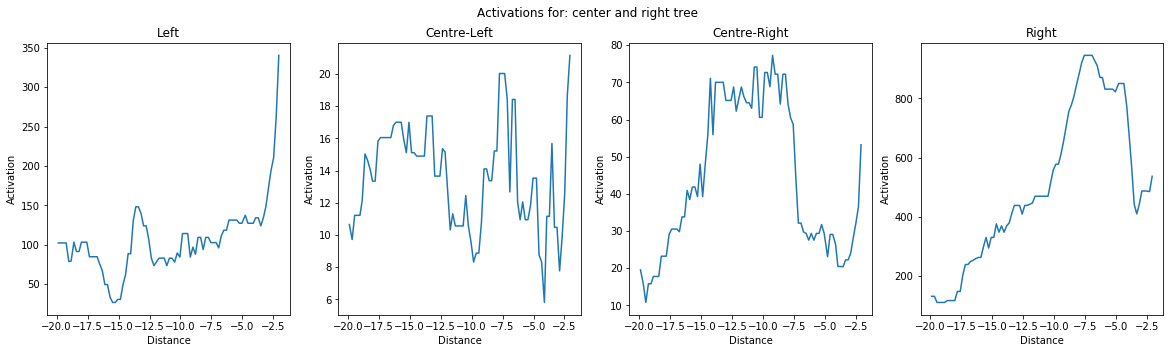


  - activation_0:

    - Mean: 106.55
    - Median: 102.84
    - Std: 45.24

  - activation_1:

    - Mean: 13.6
    - Median: 13.65
    - Std: 3.21

  - activation_2:

    - Mean: 43.89
    - Median: 38.47
    - Std: 20.07

  - activation_3:

    - Mean: 500.5
    - Median: 469.34
    - Std: 261.29




In [7]:
data = [
    {
        'file': 'csv/0-right-central-obstacle-0.csv',
        'label': 'center and right tree'
    }
]

df = make_df(data)
# df = add_threshold(df, ACT0, thrs[0])
# df = add_threshold(df, ACT1, thrs[1])
# df = add_threshold(df, ACT2, thrs[2])

show(df, thr=False)